In [20]:
from scipy.io import wavfile
file = "/home/peterr/macocu/task6_speech/data/00009874.flac.wav"

def get_duration(file:str) -> float:
    rate, data = wavfile.read(file)
    return len(data)/rate

get_duration(file)

4.4

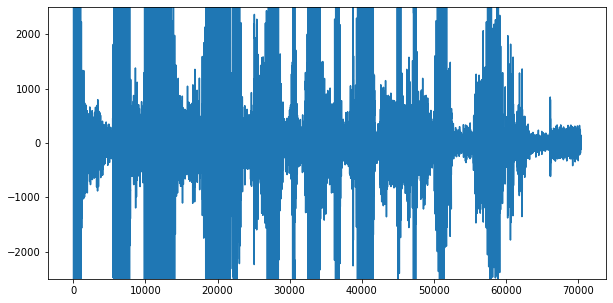

In [23]:
import audioop
rate, data = wavfile.read(file)
plt.figure(figsize=(10,5))
plt.plot(data)
plt.ylim((-2500, 2500))
plt.show()

In [4]:
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", 100)
f = "/home/nikolal/projects/parlaspeech/transcripts_normalized.txt"
df = pd.read_table(f, names=["unknown1", "path", "sentence"],
        #nrows=2000
        )

df["path"] = "/home/peterr/macocu/task6_speech/data/" + df.path.str.replace("flac/", "") + ".wav"
df["duration"] = df.path.apply(get_duration)
df = df.drop(columns="unknown1")
import os
df["filesize"] = df["path"].apply(os.path.getsize)
for char in ['*', ':', ';']:
    df["sentence"] = df.sentence.str.replace(char, "")
df.sort_values(by="filesize", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(5)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,path,sentence,duration,filesize
0,/home/peterr/macocu/task6_speech/data/00009875.flac.wav,znači žalili su se zbog dugotrajnosti rješavanja postupka na sudovima na rad i ponašanje pojedin...,114.4,3660878
1,/home/peterr/macocu/task6_speech/data/00018811.flac.wav,formiranje nacionalne politike i kada mi danas raspravljamo o tome što je glavni uzrok nepostoja...,85.0,2720078
2,/home/peterr/macocu/task6_speech/data/00006520.flac.wav,ovakvo je to kretanje u dvanaest mjesecu dvije tisuće deset godine imali smo dvadeset pet tisuća...,80.6,2579278
3,/home/peterr/macocu/task6_speech/data/00014693.flac.wav,pa evo kolega paneniću vi ste spomenuli jedinice lokalne i regionalne samouprave da oni imaju ve...,79.6,2547278
4,/home/peterr/macocu/task6_speech/data/00007188.flac.wav,dakle stav kluba hadezea je dakle da je ovo vrlo kvalitetan pomak u smislu mijenjanja načina rad...,74.6,2387278


In [5]:
df.loc[df.path.str.contains("09874"),"sentence"], 

(17931    a o tome govori i tematika zbog kojeg su se sve žalili 
 Name: sentence, dtype: object,)

In [6]:
df.loc[df.path.str.contains("00000001"),"sentence"],

(12901    poštovane kolegice i kolege zastupnici molio bi da nastavimo sa radom sjednice 
 Name: sentence, dtype: object,)

## How many files are over 1MB?

In [7]:
sum(df.filesize > 2**20/2)

4939

# How many files are over 20s?

In [8]:
sum(df.duration > 20)

3094

How does the distribution of word counts look like?

In [9]:
df["wordcount"] = [len(s.split()) for s in df.sentence.values]
df.head()

,path,sentence,duration,filesize,wordcount
0,/home/peterr/macocu/task6_speech/data/00009875.flac.wav,znači žalili su se zbog dugotrajnosti rješavanja postupka na sudovima na rad i ponašanje pojedin...,114.4,3660878,198
1,/home/peterr/macocu/task6_speech/data/00018811.flac.wav,formiranje nacionalne politike i kada mi danas raspravljamo o tome što je glavni uzrok nepostoja...,85.0,2720078,146
2,/home/peterr/macocu/task6_speech/data/00006520.flac.wav,ovakvo je to kretanje u dvanaest mjesecu dvije tisuće deset godine imali smo dvadeset pet tisuća...,80.6,2579278,125
3,/home/peterr/macocu/task6_speech/data/00014693.flac.wav,pa evo kolega paneniću vi ste spomenuli jedinice lokalne i regionalne samouprave da oni imaju ve...,79.6,2547278,161
4,/home/peterr/macocu/task6_speech/data/00007188.flac.wav,dakle stav kluba hadezea je dakle da je ovo vrlo kvalitetan pomak u smislu mijenjanja načina rad...,74.6,2387278,112


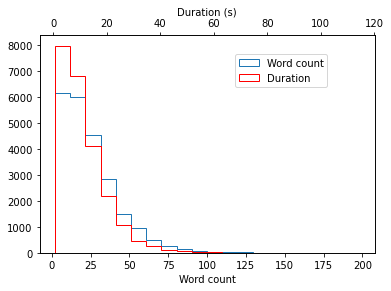

In [13]:
import matplotlib.pyplot as plt
# import plotext as plt

fig, ax = plt.subplots()
ax.hist(df.wordcount, bins=20, histtype="step", label="Word count", )
ax.set_xlabel("Word count")

ax2 = plt.twiny()
ax2.hist(df.duration, bins=20, color="red", histtype="step", label="Duration", )
ax2.set_xlabel("Duration (s)")

fig.legend(loc=(0.6, 0.7))
plt.savefig("images/histogram2.png")
plt.show()

In [30]:
df["textpath"] = df.path.str.replace(".flac.wav", ".txt")

In [32]:
for row in df.iterrows():
    sentence = row[1]["sentence"]
    textpath = row[1]["textpath"]
    new_sentence = ""
    i = 1
    ITER_COUNT = 10
    for char in sentence:
        if char == " ":
            if i % ITER_COUNT == 0:
                char = "\n"
            i += 1
        new_sentence += char
    with open(textpath, "w") as f:
        f.write(new_sentence)